IMPORT LIBRARY

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

DATA UNDERSTANDING

In [12]:
# 1. Data Information
df = pd.read_csv("data_balita.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


DATA PREPARATIONS

In [13]:
# 1. Check Missing Value
df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [14]:
# 2. Change Columns
df = df.rename(columns={'Status Gizi': 'Status', 'Jenis Kelamin': 'Gender'})
df['Gender'] = df['Gender'].astype(str)
df['Status'] = df['Status'].astype(str)

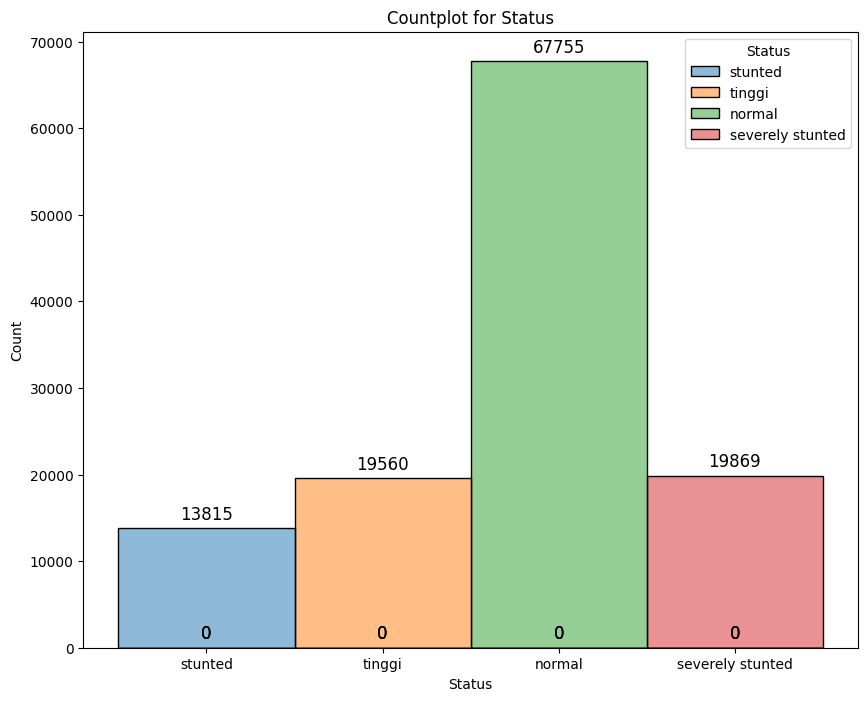

In [15]:
# 3. Data Visualizations
plt.figure(figsize=(10,8))
sns.histplot(data=df, x="Status", hue="Status")

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10),         
    textcoords='offset points', fontsize=12)
plt.title('Countplot for Status')    
plt.show()

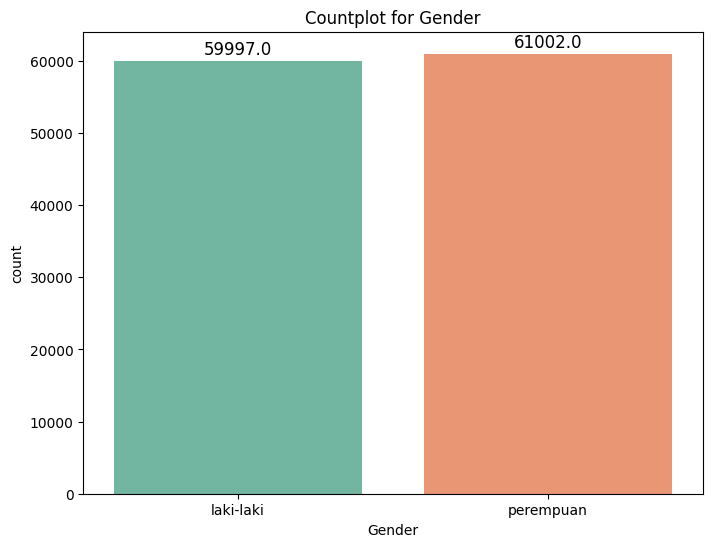

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Countplot for Gender')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() /2., p.get_height()), ha='center', va='center', xytext=(0, 8), 
    textcoords='offset points', fontsize=12)
plt.show()

In [17]:
# 4. Split Data
X = df.drop('Status', axis=1)
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

X_train_encoded[['Gender']]=encoder.fit_transform(X_train[['Gender']])
X_test_encoded[['Gender']]=encoder.fit_transform(X_test[['Gender']])

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

MODELING

Accuracy Score: 99.85%

Classification Report for XGBoost: 
                  precision    recall  f1-score   support

          normal       1.00      1.00      1.00     13382
severely stunted       1.00      1.00      1.00      4130
         stunted       0.99      1.00      0.99      2790
          tinggi       1.00      1.00      1.00      3898

        accuracy                           1.00     24200
       macro avg       1.00      1.00      1.00     24200
    weighted avg       1.00      1.00      1.00     24200



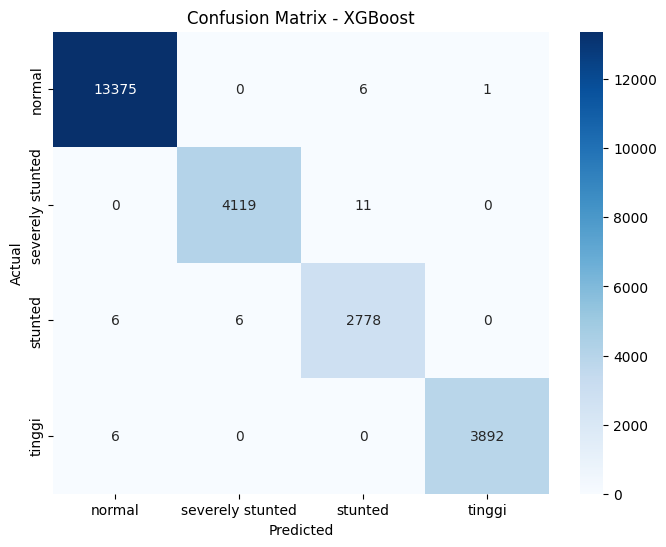

In [34]:
# 1. XGBoost Classification
xgbc_model = XGBClassifier(random_state=42)
xgbc_model.fit(X_train_encoded, y_train_encoded)

y_pred_encoded = xgbc_model.predict(X_test_encoded)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

acc_xgbc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_xgbc*100:.2f}%\n")

# Classification Report
print("Classification Report for XGBoost: ")
print(classification_report(y_test, y_pred))

# Confusion Matrix for XGBoost
conf_matrix_xgboost = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgboost, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy Score: 99.90%

Classification Report for KNN Algorithm: 
                  precision    recall  f1-score   support

          normal       1.00      1.00      1.00     13382
severely stunted       1.00      1.00      1.00      4130
         stunted       1.00      1.00      1.00      2790
          tinggi       1.00      1.00      1.00      3898

        accuracy                           1.00     24200
       macro avg       1.00      1.00      1.00     24200
    weighted avg       1.00      1.00      1.00     24200



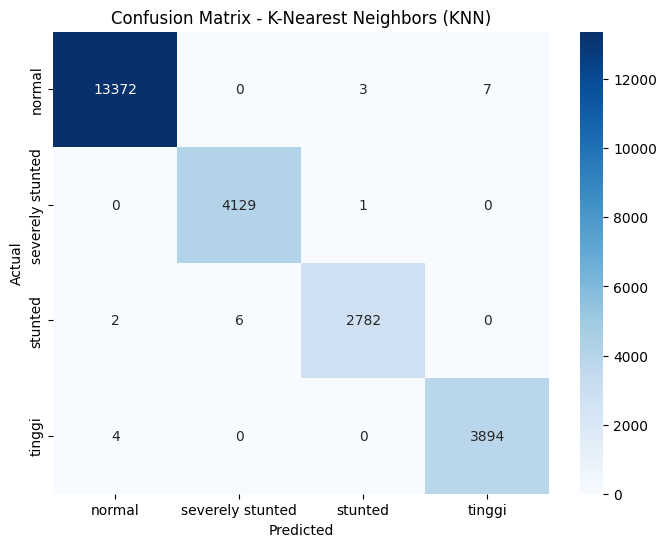

In [29]:
# 2. KNN Algorithm
knn = KNeighborsClassifier()
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_encoded, y_train_encoded)

y_pred_encoded = knn_model.predict(X_test_encoded)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

acc_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_knn*100:.2f}%\n")

# Classification Report
print("Classification Report for KNN Algorithm: ")
print(classification_report(y_test, y_pred))


# Confusion Matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - K-Nearest Neighbors (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

COMPARISON BETWEEN XGBOOST AND KNN

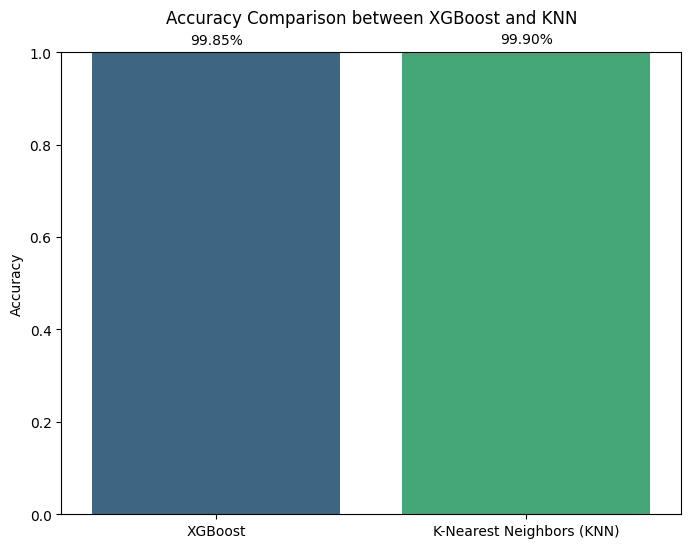

In [33]:
# Bar chart
models = ['XGBoost', 'K-Nearest Neighbors (KNN)']
accuracies = [acc_xgbc, acc_knn]

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Accuracy Comparison between XGBoost and KNN\n')
plt.ylim(0, 1) 
plt.ylabel('Accuracy')
for i, v in enumerate(accuracies):
    barplot.text(i, v + 0.02, f'{v*100:.2f}%', color='black', ha='center')  
plt.show()